# Chapter 1: Introduction to fast.ai

This notebook replicates the examples from Chapter 1 of the fast.ai book, focusing on image classification.

In [1]:
# Import the necessary libraries
from fastai.vision.all import *

## Downloading and Exploring the Dataset

We'll use the Oxford-IIIT Pet Dataset which contains images of cats and dogs with their breeds.

In [2]:
# Download the pet dataset
path = untar_data(URLs.PETS)
path

Path('/home/satishthakur/.fastai/data/oxford-iiit-pet')

In [3]:
# Look at what's in the dataset
Path(path).ls()

(#2) [Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images'),Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/annotations')]

In [4]:
# Look at the images directory
Path(path/'images').ls()[:5]

(#5) [Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images/Bengal_84.jpg'),Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images/great_pyrenees_176.jpg'),Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images/Ragdoll_185.jpg'),Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images/Russian_Blue_109.jpg'),Path('/home/satishthakur/.fastai/data/oxford-iiit-pet/images/great_pyrenees_186.jpg')]

## Data Preparation

Now we'll prepare the data for our model. We need to:
1. Specify the path to our images
2. Define how to get labels from the filenames
3. Create a DataBlock with appropriate transformations

In [8]:
# Function to get the label from the filename
def is_cat(fname):
    # Extract just the file name from the path
    name = str(fname.name)
    # In this dataset, filenames that start with uppercase are cats
    return name[0].isupper()

In [9]:
# Create a DataBlock
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=is_cat,
                 item_tfms=Resize(224))

In [10]:
# Create the DataLoaders
dls = pets.dataloaders(path/"images")

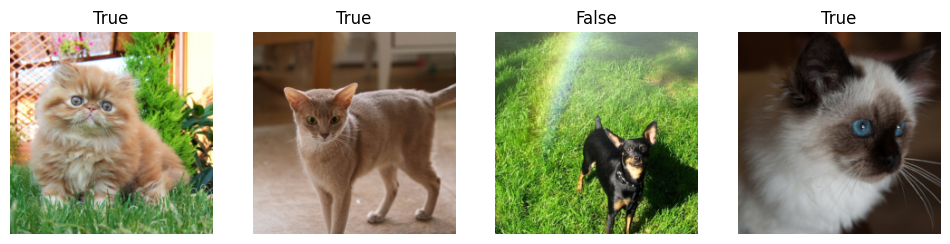

In [11]:
# Show a batch of images
dls.show_batch(max_n=4, nrows=1)

## Training a Model

Now we'll train a model to classify images as cats or dogs.

In [12]:
# Create and train the model
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.162174,0.032697,0.010149,00:14


epoch,train_loss,valid_loss,error_rate,time
0,0.055130,0.022128,0.006089,00:19


## Using the Model for Inference

Now let's use our trained model to make predictions on new images.

In [13]:
# Get some sample images from the validation set
x, y = dls.valid.one_batch()
len(x), len(y)

(64, 64)

In [14]:
# Make predictions
preds, _ = learn.get_preds(dl=dls.valid)
preds.shape

torch.Size([1478, 2])

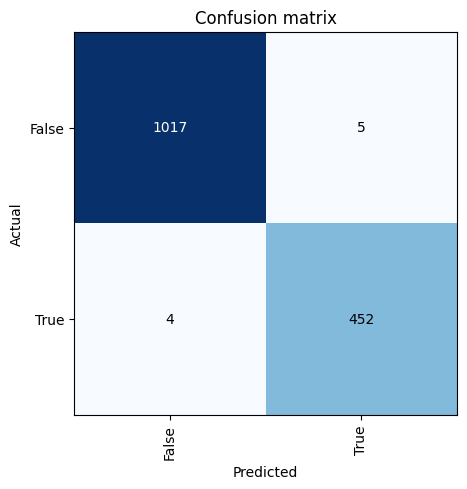

In [15]:
# Plot the confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Data Augmentation

We can improve our model with data augmentation.

In [ ]:
# Create a new DataBlock with data augmentation
pets_aug = DataBlock(blocks=(ImageBlock, CategoryBlock),
                     get_items=get_image_files,
                     splitter=RandomSplitter(valid_pct=0.2, seed=42),
                     get_y=is_cat,
                     item_tfms=Resize(224),
                     batch_tfms=aug_transforms())

In [ ]:
# Create the DataLoaders with augmentation
dls_aug = pets_aug.dataloaders(path/"images")

In [ ]:
# Show a batch with augmentation
dls_aug.show_batch(max_n=4, nrows=1)

In [ ]:
# Train with augmentation
learn_aug = vision_learner(dls_aug, resnet34, metrics=error_rate)
learn_aug.fine_tune(1)

## Saving and Loading the Model

In [ ]:
# Save the model
learn_aug.save('pet_classifier')

In [ ]:
# Load the model
learn_loaded = vision_learner(dls_aug, resnet34, metrics=error_rate)
learn_loaded.load('pet_classifier')

## Further Experiments

Try these experiments to deepen your understanding:

1. Train for more epochs to see if the model improves
2. Try different data augmentation techniques
3. Use a different pretrained model like resnet50
4. Modify the training to classify by breed instead of just cat/dog